In [ ]:
#inclusiones

import MLP_Complete as mlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Utils as utl

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# lectura de los datos

data = pd.read_csv('preprocessedData.csv')
print(data)

       NEIGHBORHOOD_DIST_UP  NEIGHBORHOOD_DIST_DOWN  NEIGHBORHOOD_DIST_RIGHT  \
0                 -0.684556               -0.724185                -0.604051   
1                 -0.684556               -0.724185                -0.604051   
2                 -0.684556               -0.724185                -0.604051   
3                 -0.684556               -0.668749                -0.604051   
4                 -0.684556               -0.576356                -0.604051   
...                     ...                     ...                      ...   
36098             -0.646010               -0.705519                -0.669547   
36099             -0.646010               -0.705519                -0.669547   
36100             -0.646010                1.142343                -0.669547   
36101             -0.571700                1.068428                -0.669547   
36102             -0.478812                0.976034                -0.625280   

       NEIGHBORHOOD_DIST_LEFT  AGENT_1_

In [4]:
# separa los datos en datos de entrenamiento y datos de testeo (dividir tmb en datos de confirmacion???)

# coge todos los datos menos la columna de action (la solucion)
X = data.drop('action', axis=1).values

# convierte la columna de action en una tabla bidimensional de trues y falses indicando que accion esta en cada caso
y = pd.get_dummies(data['action']).values
#print(y)

y_labels = data['action'].values
print(y_labels)

# separa los datos ->
# y_train_lbl; y_test_lbl -> se refiere a las columnas de action que estan procesadas como labeled
# no se si hace falta separar tmb los labeles, es literalmente lo que es y lmao
X_train, X_test, y_train, y_test, y_train_lbl, y_test_lbl = train_test_split(
    X, y, y_labels, random_state=42, test_size=0.33, shuffle=True
)

#print(y_train_lbl)
#print(y_test_lbl)

[0 0 0 ... 4 2 2]


A.) MLP Classifier Complete

In [5]:
LAYERS=(62, 70)
LAMBDA=0.001
LR_INIT=0.5
ITERATIONS=10000


# guardando info de otra iteraciones
# 68,70 -> 75,95
# 70,70 -> 76,48
# 75,70 -> 76.15
# 70,100 -> ?

# 70, 70; 0,5 lr; 6k it -> 77.44


In [ ]:
# MAX ACC 3 capas ocultas
#LAYERS=(62, 70, 90)
#LAMBDA=0.001
#LR_INIT=0.5
#ITERATIONS=10000
# acc = 79,73
# si que es verdad que tarda mas de 40mins -> probablemente sea un problema con el modelo y no con los datos por el gran coste de entrenamiento

# MAX ACC 2 capas ocultas
#LAYERS=(62, 70)
#LAMBDA=0.001
#LR_INIT=0.5
#ITERATIONS=10000
# acc = 80.04

mlp_custom = mlp.MLP_Complete(inputLayer=X_train.shape[1], hiddenLayers=list(LAYERS), outputLayer=y_train.shape[1], seed=42)
mlp_custom.backpropagation(X_train, 
                        y_train, 
                        alpha=LR_INIT, 
                        lambda_=LAMBDA, 
                        numIte=ITERATIONS, 
                        verbose=100)

a, z = mlp_custom.feedforward(X_test)
y_pred_custom = mlp_custom.predict(a[-1])
    
acc_custom = accuracy_score(np.argmax(y_test, axis=1), y_pred_custom)

print(f"-> Validacion Custom MLP: {acc_custom * 100:.2f}%")

Iteration      1: Cost   3.5046   
Iteration    101: Cost   2.3319   
Iteration    201: Cost   2.3262   
Iteration    301: Cost   2.1751   
Iteration    401: Cost   1.8048   
Iteration    501: Cost   1.7849   
Iteration    601: Cost   1.7696   
Iteration    701: Cost   1.7533   
Iteration    801: Cost   1.7338   
Iteration    901: Cost   1.7117   
Iteration   1001: Cost   1.6878   
Iteration   1101: Cost   1.6507   
Iteration   1201: Cost   1.5852   
Iteration   1301: Cost   1.5479   
Iteration   1401: Cost   1.5298   
Iteration   1501: Cost   1.5165   
Iteration   1601: Cost   1.5042   
Iteration   1701: Cost   1.4904   
Iteration   1801: Cost   1.4724   
Iteration   1901: Cost   1.4518   
Iteration   2001: Cost   1.4366   
Iteration   2101: Cost   1.4252   
Iteration   2201: Cost   1.4145   
Iteration   2301: Cost   1.4038   
Iteration   2401: Cost   1.3928   
Iteration   2501: Cost   1.3816   
Iteration   2601: Cost   1.3732   
Iteration   2701: Cost   1.3737   
Iteration   2801: Co

In [6]:
mlp_sklearn = MLPClassifier(
        hidden_layer_sizes=LAYERS,
        activation='logistic',     
        solver='sgd',             
        max_iter=ITERATIONS,
        learning_rate="constant",
        learning_rate_init=LR_INIT,
        alpha=LAMBDA,             
        random_state=42,
        n_iter_no_change=100,
        verbose=True
    )

mlp_sklearn.fit(X_train, y_train_lbl)

y_pred_sklearn = mlp_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test_lbl, y_pred_sklearn)

print(f"-> Validacion SKLearn MLP: {acc_sklearn * 100:.2f}%")

Iteration 1, loss = 1.23335349
Iteration 2, loss = 0.95149420
Iteration 3, loss = 0.90354762
Iteration 4, loss = 0.86725510
Iteration 5, loss = 0.82600919
Iteration 6, loss = 0.79292872
Iteration 7, loss = 0.76506349
Iteration 8, loss = 0.74552245
Iteration 9, loss = 0.72505041
Iteration 10, loss = 0.70981581
Iteration 11, loss = 0.69200078
Iteration 12, loss = 0.68009136
Iteration 13, loss = 0.66548711
Iteration 14, loss = 0.65061430
Iteration 15, loss = 0.64546615
Iteration 16, loss = 0.63410047
Iteration 17, loss = 0.62654679
Iteration 18, loss = 0.61693982
Iteration 19, loss = 0.61037235
Iteration 20, loss = 0.60346967
Iteration 21, loss = 0.59555075
Iteration 22, loss = 0.59055343
Iteration 23, loss = 0.58454337
Iteration 24, loss = 0.57880301
Iteration 25, loss = 0.57398495
Iteration 26, loss = 0.56992565
Iteration 27, loss = 0.56358918
Iteration 28, loss = 0.56025802
Iteration 29, loss = 0.55172819
Iteration 30, loss = 0.55031457
Iteration 31, loss = 0.54442600
Iteration 32, los

B.) Comparacion con el MLP Classifier de SKLearn

In [121]:
if abs(acc_custom - acc_sklearn) < 0.1:
    print("Los modelos se parecen en un rango del 10%")
else:
    print("Hay diferencia notable entre ambos modelos")

print(f"-> Validacion Custom MLP: {acc_custom * 100:.2f}%")
print(f"-> Validacion SKLearn MLP: {acc_sklearn * 100:.2f}%")

Los modelos se parecen en un rango del 10%
-> Validacion Custom MLP: 78.94%
-> Validacion SKLearn MLP: 83.17%


C.) MLP Classifier de SKLearn 

In [113]:
LAYERS=(62, 70)
LAMBDA=0.001
LR_INIT=0.01
ITERATIONS=2000

mlp_sklearn = MLPClassifier(
        hidden_layer_sizes=LAYERS,
        activation='logistic',     
        solver='sgd',             
        max_iter=ITERATIONS,
        learning_rate="constant",
        learning_rate_init=LR_INIT,
        alpha=LAMBDA,             
        random_state=42,
        n_iter_no_change=100,
        verbose=True
    )

mlp_sklearn.fit(X_train, y_train_lbl)

y_pred_sklearn = mlp_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test_lbl, y_pred_sklearn)

print(f"-> Validacion SKLearn MLP: {acc_sklearn * 100:.2f}%")

Iteration 1, loss = 1.48339861
Iteration 2, loss = 1.44781385
Iteration 3, loss = 1.38727920
Iteration 4, loss = 1.25521962
Iteration 5, loss = 1.14320705
Iteration 6, loss = 1.09665034
Iteration 7, loss = 1.07552396
Iteration 8, loss = 1.06134710
Iteration 9, loss = 1.04730367
Iteration 10, loss = 1.03169869
Iteration 11, loss = 1.01364199
Iteration 12, loss = 0.99446172
Iteration 13, loss = 0.97784206
Iteration 14, loss = 0.96360978
Iteration 15, loss = 0.95255025
Iteration 16, loss = 0.94371330
Iteration 17, loss = 0.93715392
Iteration 18, loss = 0.93127243
Iteration 19, loss = 0.92666338
Iteration 20, loss = 0.92269799
Iteration 21, loss = 0.91930588
Iteration 22, loss = 0.91673917
Iteration 23, loss = 0.91410160
Iteration 24, loss = 0.91132529
Iteration 25, loss = 0.90865247
Iteration 26, loss = 0.90675168
Iteration 27, loss = 0.90456920
Iteration 28, loss = 0.90286136
Iteration 29, loss = 0.90091759
Iteration 30, loss = 0.89885235
Iteration 31, loss = 0.89695830
Iteration 32, los

c:\Users\ineso\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


D.) KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_lbl)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test_lbl, y_pred_knn)

print(f"-> Validacion KNN: {acc_knn * 100:.2f}%")

-> Precisión KNN: 82.97%


E.) Decision Tree & Random Forest TODO

In [ ]:
# Esto peta
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train_lbl)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test_lbl, y_pred_dt)

print(f"-> Validacion DT: {acc_dt * 100:.2f}%")

rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train_lbl)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test_lbl, y_pred_rf)

print(f"-> Validacion RF: {acc_rf * 100:.2f}%")

-> Precisión DT: 80.58%
-> Validacion RF: 88.70%


F.) Matriz de Confusion y otras metricas TODO

Text(0.5, 1.0, 'RF\nAcc: 88.70%')

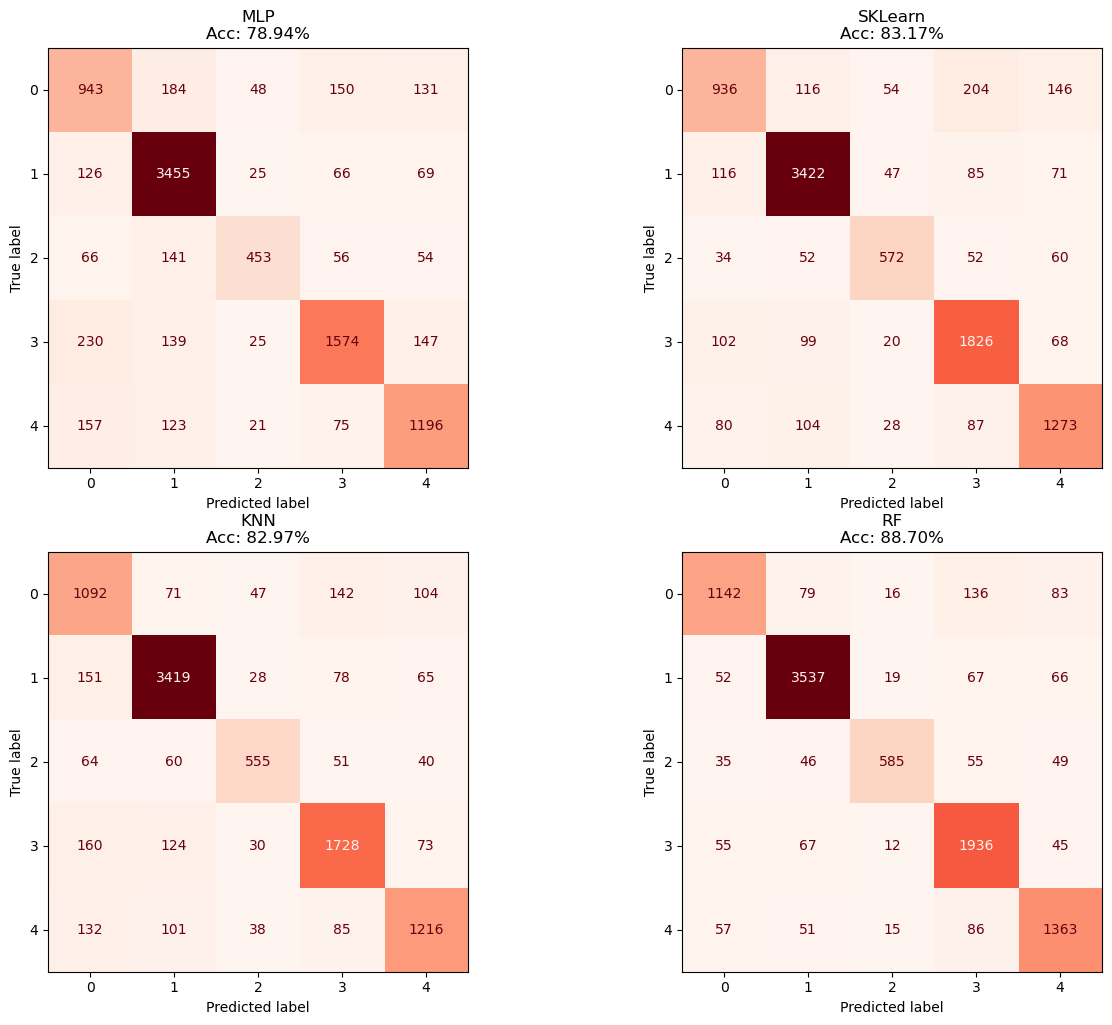

In [120]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_custom, ax=axes[0], cmap="Reds", colorbar=False)
axes[0].set_title(f"MLP\nAcc: {acc_custom * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_sklearn, ax=axes[1], cmap="Reds", colorbar=False)
axes[1].set_title(f"SKLearn\nAcc: {acc_sklearn * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_knn, ax=axes[2], cmap="Reds", colorbar=False)
axes[2].set_title(f"KNN\nAcc: {acc_knn * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test_lbl, y_pred_rf, ax=axes[3], cmap="Reds", colorbar=False) #Esto peta -> ya no
axes[3].set_title(f"RF\nAcc: {acc_rf * 100:.2f}%")

El modelo que mas puntuacion de validacion tiene de todos los que hemos probado es claramente el Random Forest con un aplastante 88.7% de accuracy o validacion.

No obstante, el Random Forest es un modelo de caja gris, es decir, no es completamente explicable y es claramente menos explicable que los Arboles de decision (DT) y los vecinos (KNN); estos dos modelos han obtenido puntuaciones un poco mas bajas, de 82.92% y 80.58% brespectivamente; aun teniendo puntuaciones mas bajas, su explicabilidad les da bastante puntos a favor, puntos que se les quitan por ser ambos muy sensibles al ruido: en nuestro caso, movimientos que no son necesariamente utiles pero que el jugador puede hacer igualmente. 

Por otro lado, el MLP de SKLearn ha conseguido una puntuacion de 85.33%, sin embargo, las redes neuronales son modelos de caja negra (no explicables) y, a la hora de hacer una ia para un juego, esta bien saber de donde vienen las decisiones tomadas por el modelo para asi poder optimizarlo o modificar su dificultad; además, es muy costoso entrenar una red neuronal como el perceptron multicapa, asi como lo es entrenar un modelo de KNN.

Dicho todo esto, la decisión que más sentido tiene es el RF que, además de tener buena puntuacion de validacion, tiene un gran ration tiempo de entrenamiento-calidad de los resultados y no pierde toda su explicabilidad al ser de caja gris.


G.) Exportar

In [7]:
utl.ExportAllformatsMLPSKlearn(mlp_sklearn, X, "picle_format", "onix_format", "json_format", "custom_format.txt")

Capa  coefficient
procesando  coefficient
['31', '62']
coefficient
[-5.084893985318074, 1.5279248732519235, -1.6354072502428572, -1.8030330013550464, -5.835330340440073, -11.2123285393312, -8.70279272094551, 5.3719662996057735, -4.076145073153353, -3.6324417935913194, -6.454237062609787, -1.6906570194469306, 0.8646900890433574, -3.5077784421453164, 2.184891354056107, 3.609207737736269, -2.5149380171373723, -5.710194597702904, -1.5758369155547352, 1.2483746491440304, 3.607638781589169, 2.6314948776783686, -3.893609186787338, 2.046696229843988, 0.2871737409124933, 2.299129548354457, -1.8343249096397691, 3.258995497203427, 0.3562715835980834, -3.0961383266047062, -1.8675516227488296, -2.9061525362337943, -0.49208244084849345, -0.08590492960620512, 4.201571281462639, 0.13750159329327818, -4.728762940844608, -1.004869231468746, -0.39935140754391624, 0.9961385010628511, 1.9142071329432582, -0.4349530959034913, 11.124783233227888, -2.6809909100788567, -7.90068111448302, 1.5554331648291193, 0.